In [48]:
import numpy as np
import pandas as pd

In [49]:
data = pd.read_csv("C:/Users/Lenovo/Downloads/heart_kmeans.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [50]:
x =data[["age","chol"]]
x

,age,chol
0,52,212
1,53,203
2,70,174
3,61,203
4,62,294
...,...,...
1020,59,221
1021,60,258
1022,47,275
1023,50,254


In [51]:
x.isnull().sum()

age     0
chol    0
dtype: int64

In [52]:
x.describe

<bound method NDFrame.describe of       age  chol
0      52   212
1      53   203
2      70   174
3      61   203
4      62   294
...   ...   ...
1020   59   221
1021   60   258
1022   47   275
1023   50   254
1024   54   188

[1025 rows x 2 columns]>

Text(0, 0.5, 'age')

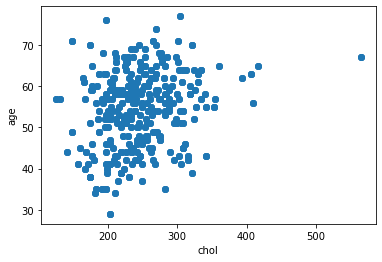

In [53]:
import matplotlib.pyplot as plt
plt.scatter(x.chol,x.age)
plt.xlabel("chol")
plt.ylabel("age")

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.26843658, -0.65933209],
       [-0.15815703, -0.83386117],
       [ 1.71659547, -1.39623266],
       ...,
       [-0.81983438,  0.56237149],
       [-0.4889957 ,  0.15513696],
       [-0.04787747, -1.12474297]])

In [56]:
list(range(2,12))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [62]:
model_labels={}
centroids={}
i_score=[]
s_score=[]
for k in range(2,12):
    model=KMeans(n_clusters=k)
    model=model.fit(x) 
    labels=model.labels_
    model_labels[k]=labels
    i_score.append(model.inertia_)
    s_score.append(silhouette_score(x,labels))
    centroids[k]=model.cluster_centers_
    
    print(f"inertia {model.inertia_} silhouette {silhouette_score(x,labels)}")
    

inertia 1263.7902483998384 silhouette 0.36159750619509057
inertia 854.8284036557651 silhouette 0.3668962164263688
inertia 687.6274742819223 silhouette 0.35616671714500986
inertia 553.7158094531553 silhouette 0.35739146156612894
inertia 465.6918964633779 silhouette 0.36638470944021
inertia 397.3591881447312 silhouette 0.36364273519637597
inertia 354.96922863096216 silhouette 0.3504510963841864
inertia 314.53167374292514 silhouette 0.3544702727069641
inertia 283.7914240788577 silhouette 0.3453139709082745
inertia 252.66123196734176 silhouette 0.3774970545589714
